## Extract FLASH Data in yt
Mirielle Wong

6/21/24

Use yt's covering_grid class to extract data from FLASH.

In [1]:
# https://yt-project.org/

import yt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# plot_path = "./OSIRIS_transfer/MAGOFF/MagShockZ_hdf5_plt_cnt_0004"
plot_path = "./OSIRIS_transfer/MAGON/MagShockZ_hdf5_chk_0005"

In [3]:
ds = yt.load(plot_path)
list(ds.fields.flash)

yt : [INFO     ] 2024-07-22 13:04:09,623 Particle file found: MagShockZ_hdf5_chk_0005
yt : [INFO     ] 2024-07-22 13:04:09,658 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2024-07-22 13:04:09,658 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2024-07-22 13:04:09,659 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2024-07-22 13:04:09,660 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2024-07-22 13:04:09,660 Parameters: cosmological_simulation   = 0


[On-Disk Field ('flash', 'absr'): (units: '', display_name: 'Absorption Coefficient'),
 On-Disk Field ('flash', 'cham'): (units: '', display_name: 'Chamber Material Fraction'),
 On-Disk Field ('flash', 'cond'): (units: '', display_name: 'Conductivity'),
 On-Disk Field ('flash', 'dbgs'): (units: '', display_name: 'Debug for Shocks'),
 On-Disk Field ('flash', 'dens'): (units: 'code_mass/code_length**3'),
 On-Disk Field ('flash', 'depo'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'dfcf'): (units: '', display_name: 'Diffusion Equation Scalar'),
 On-Disk Field ('flash', 'divb'): (units: 'code_magnetic/code_length'),
 On-Disk Field ('flash', 'eele'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Electron Internal Specific Energy'),
 On-Disk Field ('flash', 'eint'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'eion'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Ion Internal Specific Energy'),
 On-Disk Field ('

In [4]:
print(ds.domain_dimensions)
domain_left_edge = [-0.6, -0.075, -0.6]    # from info printed in yt.load

[288 272 288]


In [5]:
# this is from the yt documentation

level = 2
dims = ds.domain_dimensions * ds.refine_by**level

# We construct an object that describes the data region and structure we want
# In this case, we want all data up to the maximum "level" of refinement
# across the entire simulation volume.  Higher levels than this will not
# contribute to our covering grid.
all_data = ds.covering_grid(
    level,
    left_edge=domain_left_edge,
    dims=dims,
    # And any fields to preload (this is optional!)
)

In [6]:
# relevant vars

print(ds.units)
print(ds.length_unit)
print(ds.mass_unit)
print(dims)
print(ds.domain_dimensions)
print(ds.refine_by)

1.0 cm
1.0 g
[1152 1088 1152]
[288 272 288]
2


In [7]:
data_level0 = ds.covering_grid(
    1,
    left_edge = domain_left_edge,
    dims = ds.domain_dimensions
)

yt : [INFO     ] 2024-07-22 13:04:10,971 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 13:04:10,972 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-22 13:04:10,974 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 13:04:10,974 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-22 13:04:10,977 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800



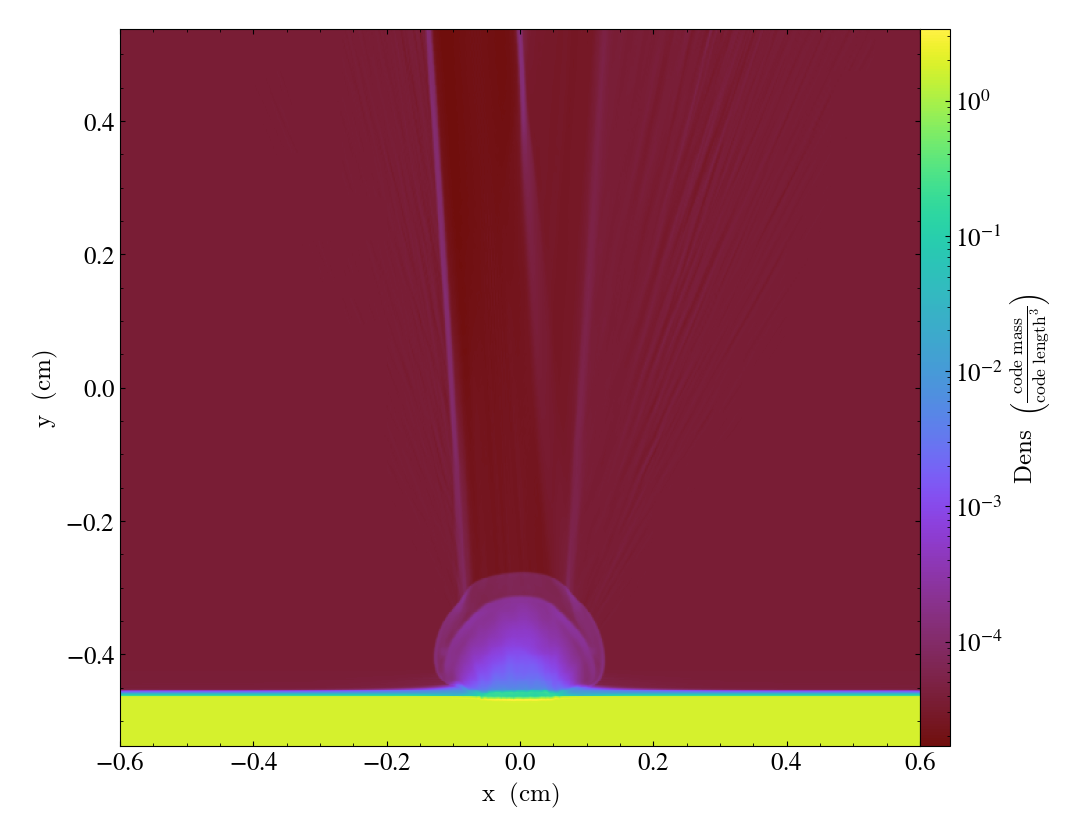

In [8]:
slc = yt.SlicePlot(ds,"z",("dens"))
# slc.annotate_streamlines(("vely"), ("velz"))
slc

In [9]:
slc = yt.SlicePlot(ds,'z','dens')
slc.save()

yt : [INFO     ] 2024-07-22 13:04:11,513 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 13:04:11,513 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-22 13:04:11,515 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 13:04:11,515 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-22 13:04:11,516 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800
yt : [INFO     ] 2024-07-22 13:04:12,034 Saving plot MagShockZ_hdf5_chk_0005_Slice_z_dens.png


['MagShockZ_hdf5_chk_0005_Slice_z_dens.png']

yt : [INFO     ] 2024-07-22 13:06:19,528 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 13:06:19,528 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-22 13:06:19,530 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 13:06:19,531 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-22 13:06:19,531 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800


dens at [0. 0. 0.] code_length: [0.22417466] code_mass/code_length**3



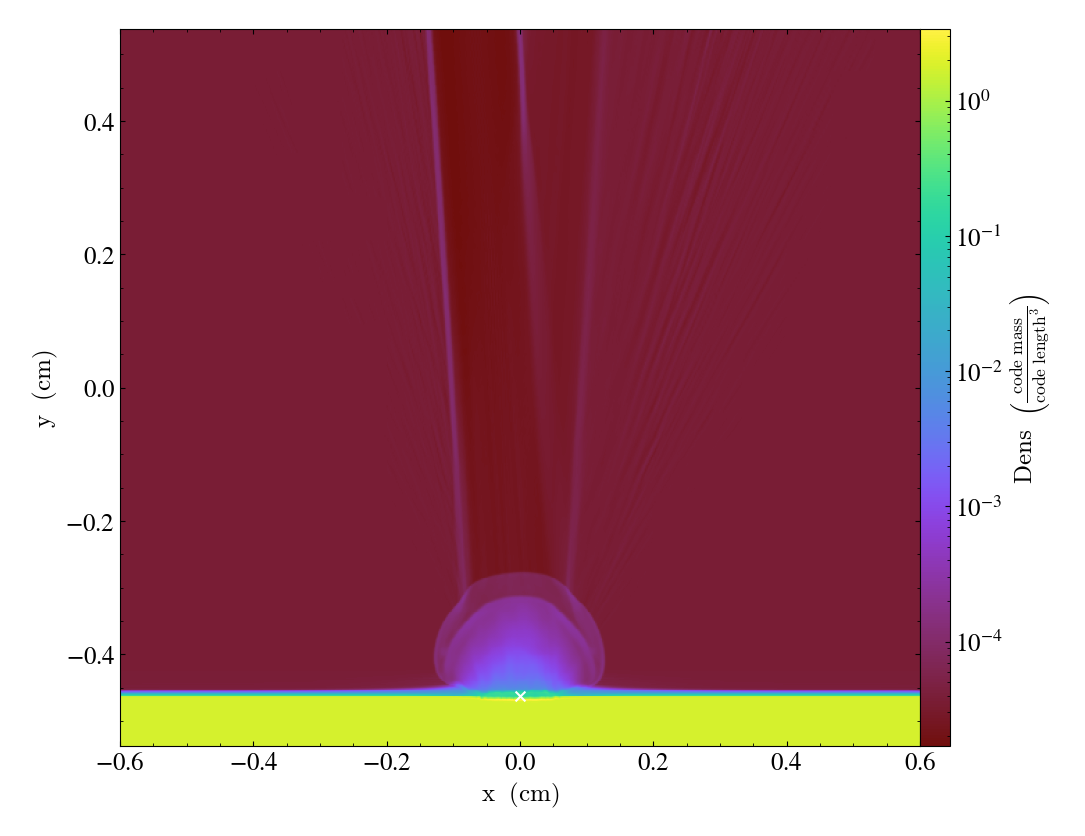

In [25]:
def pull_value_at_coord(x, y, z, field):
    slc = yt.SlicePlot(ds,"z",(field))
    
    # Convert coordinates to dataset units
    coord = ds.arr([x, y, z], 'code_length')

    # Extract the value at the specific coordinates
    value = ds.find_field_values_at_point(fields=('flash',field), coords=coord)
    print(f"{field} at {coord}: {value}")

    slc.annotate_marker(coord)
    return slc

slc_new = pull_value_at_coord(0.0,0.00,0.0,'dens')
slc_new


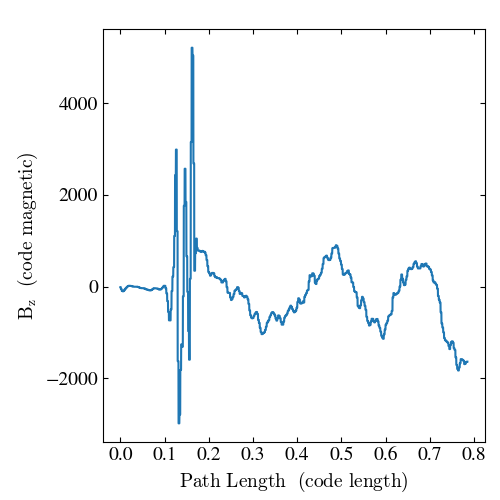

In [11]:
plot = yt.LinePlot(ds, [("flash", "magz")], (0, 0.015, 0), (0, .8, 0), 50000)
plot.set_log(("flash", "magz"),log = False)
plot


[[Model]]
    Model(model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 72
    # variables        = 3
    chi-square         = 1.4828e-05
    reduced chi-square = 2.1491e-07
    Akaike info crit   = -1102.48521
    Bayesian info crit = -1095.65521
    R-squared          = 0.92498778
[[Variables]]
    A:      0.01319612 +/- 9.5647e-04 (7.25%) (init = 0.01)
    alpha:  65.8822097 +/- 4.70416723 (7.14%) (init = 1)
    C:      5.4366e-04 +/- 7.2148e-05 (13.27%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, alpha) = +0.8811
    C(alpha, C) = +0.5204
    C(A, C)     = +0.2718


Text(0.5, 1.0, 'exponential fit of density profile')

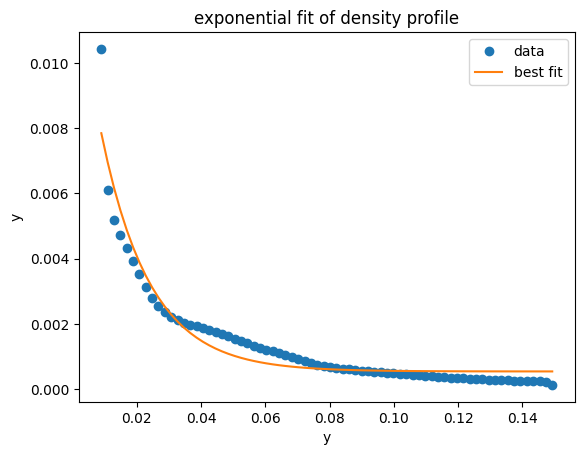

In [27]:
ray = ds.ray((0, 0.008, 0), (0, .15, 0))

dens = np.array(ray[('flash','dens')])
y = np.array(ray[('flash','y')])

from lmfit import Model

def model(y, A, alpha, C):
    return A * np.exp(-alpha * y) + C

# Create a model
exp_model = Model(model)

# Initial guess for the parameters
params = exp_model.make_params(A=0.01, alpha=1.0, B=0.0, beta=0.1, C=0.0, t0 = 0.15)

# Perform the fit
result = exp_model.fit(dens, params, y=y)

print(result.fit_report())

# Plot the data and the fitted curve
result.plot_fit()
plt.title('exponential fit of density profile')

In [13]:
print(f'A = {result.best_values["A"]} g/cm^3')
print(f'alpha = {result.best_values["alpha"]} cm^-1')
print(f'C = {result.best_values["C"]} g/cm^3')

A = 0.002314457961567581 g/cm^3
alpha = 13.636950205216129 cm^-1
C = -0.00010565254725293281 g/cm^3


In [14]:
def make_ion_number_density(field, data):
    avogadro = 1
    ion_number_density = avogadro*data["flash","dens"]/data["flash","sumy"]
    return ion_number_density

def make_electron_number_density(field, data):
    avogadro = 1
    electron_number_density = avogadro*data["flash","dens"]*data["flash","ye"]
    return electron_number_density

ds.add_field(("flash", "idens"), function=make_ion_number_density, units="code_mass/code_length**3",sampling_type="cell") #technically the units are wrong here
ds.add_field(("flash", "edens"), function=make_electron_number_density, units="code_mass/code_length**3",sampling_type="cell") # same here

yt : [INFO     ] 2024-07-22 13:04:17,419 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 13:04:17,420 ylim = -0.437500 0.637500
yt : [INFO     ] 2024-07-22 13:04:17,421 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 13:04:17,422 ylim = -0.437500 0.637500
yt : [INFO     ] 2024-07-22 13:04:17,423 Making a fixed resolution buffer of (('flash', 'vely')) 800 by 800



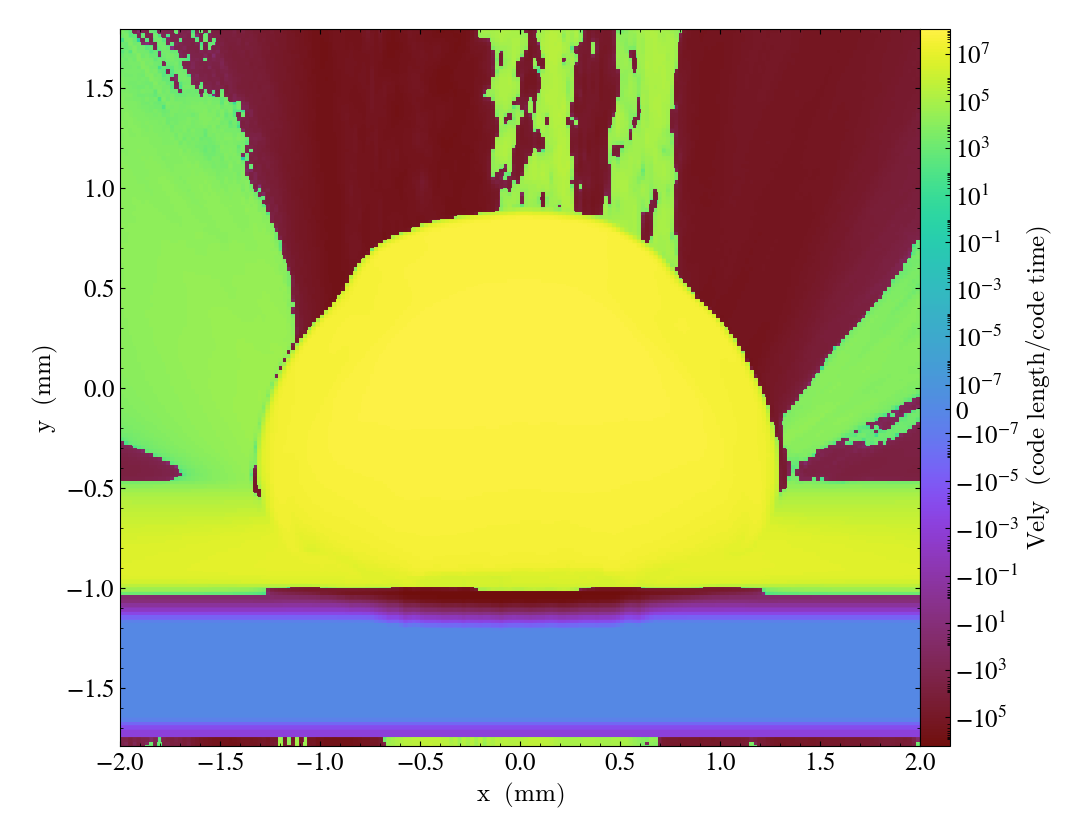

[[Model]]
    Model(model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 59
    # data points      = 98
    # variables        = 3
    chi-square         = 0.01072305
    reduced chi-square = 1.1287e-04
    Akaike info crit   = -887.792061
    Bayesian info crit = -880.037159
    R-squared          = 0.92129677
[[Variables]]
    A:      0.28520364 +/- 0.01689352 (5.92%) (init = 0.01)
    alpha:  55.0849314 +/- 3.40163834 (6.18%) (init = 1)
    C:      0.00773220 +/- 0.00135767 (17.56%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, alpha) = +0.8624
    C(alpha, C) = +0.4804
    C(A, C)     = +0.2220


<Axes: title={'center': 'Model(model)'}, xlabel='t', ylabel='y'>

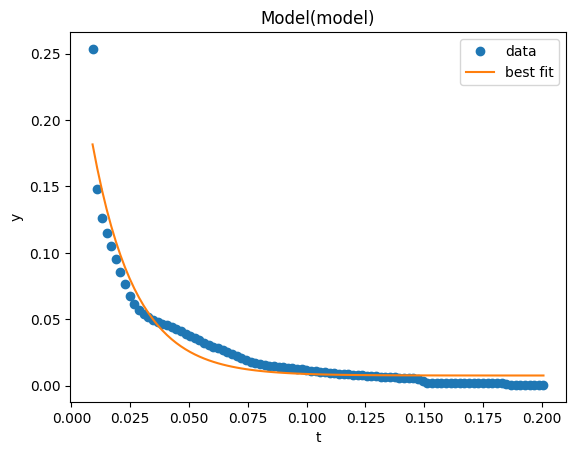

In [15]:
vely = yt.SlicePlot(ds,"z", ("flash", "vely"),center=[0.0, 0.1, 0.0],)
vely.zoom(3)
vely.show()

ray = ds.ray((0, 0.009, 0), (0, .2, 0))

dens = np.array(ray[('flash','idens')])
y = np.array(ray[('flash','y')])

from lmfit import Model

def model(t, A, alpha, C):
    return A * np.exp(-alpha * t) + C

# Create a model
exp_model = Model(model)

# Initial guess for the parameters
params = exp_model.make_params(A=0.01, alpha=1.0, B=0.0, beta=0.1, C=0.0, t0 = 0.15)

# Perform the fit
result = exp_model.fit(dens, params, t=y)

print(result.fit_report())

# Plot the data and the fitted curve
result.plot_fit()

yt : [INFO     ] 2024-07-22 13:04:18,279 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 13:04:18,279 ylim = -0.437500 0.637500
yt : [INFO     ] 2024-07-22 13:04:18,281 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 13:04:18,281 ylim = -0.437500 0.637500
yt : [INFO     ] 2024-07-22 13:04:18,282 Making a fixed resolution buffer of (('flash', 'edens')) 800 by 800



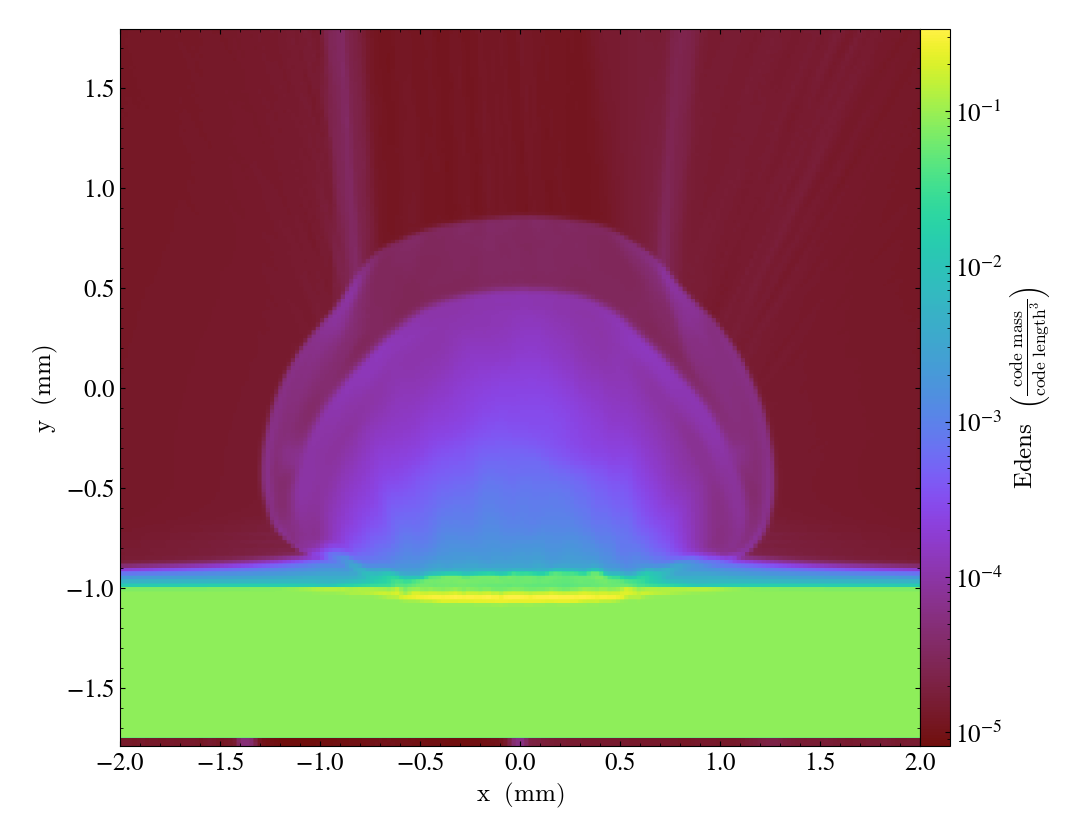

In [16]:
edens = yt.SlicePlot(ds,"z", ("flash", "edens"),center=[0.0, 0.1, 0.0],)
edens.zoom(3)
edens

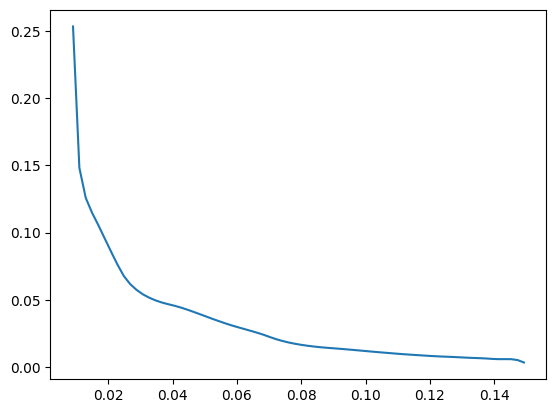

In [28]:
vely = np.array(ray[('flash','vely')])
# plt.plot(y, vely, label='ion number density')

idens = np.array(ray[('flash','idens')])
plt.plot(y, idens, label='electron number density')
# plt.legend()

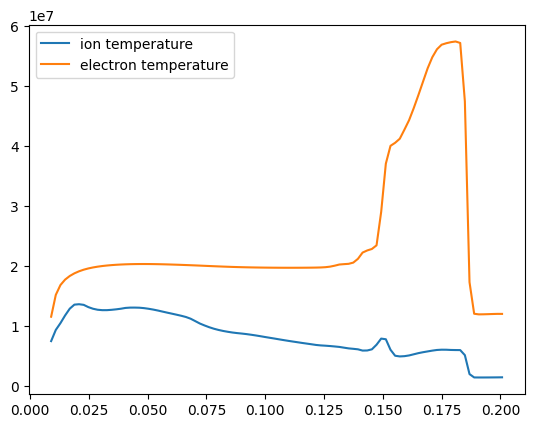

In [18]:
# list(ds.fields.flash)

tion = np.array(ray[('flash','tion')])
plt.plot(y, tion, label='ion temperature')

tele = np.array(ray[('flash','tele')])
plt.plot(y, tele, label='electron temperature')

plt.legend()